# Clustering Analysis

In [94]:
import pandas as pd 
import numpy as np 
import seaborn as s 
import matplotlib.pyplot as plt
%matplotlib inline 

In [95]:
df = pd.read_csv("Customer.csv")

In [96]:
df.head()

,CustomerID,Age,Gender,Region,IncomeLevel,PurchaseFrequency,RecencyDays,LifetimeSpend,SatisfactionScore,UpgradeInterest
0,1,39,Female,Central Europe,Medium,2,149,117.59,1,0
1,2,33,Female,Western Europe,High,6,128,465.91,4,1
2,3,41,Male,Eastern Europe,High,7,310,490.46,5,0
3,4,50,Male,Western Europe,Low,2,246,90.40,2,0
4,5,32,Male,Northern Europe,High,4,21,302.12,4,1


In [97]:
df.tail()

,CustomerID,Age,Gender,Region,IncomeLevel,PurchaseFrequency,RecencyDays,LifetimeSpend,SatisfactionScore,UpgradeInterest
9995,9996,48,Male,Central Europe,Medium,7,315,518.61,5,0
9996,9997,18,Female,Central Europe,Medium,5,55,347.20,5,1
9997,9998,27,Male,Eastern Europe,Medium,5,1,288.35,4,1
9998,9999,39,Male,Central Europe,Medium,4,57,255.04,4,1
9999,10000,41,Male,Central Europe,Medium,5,239,262.55,3,0


In [98]:
# Option 1: inplace drop (no assignment)
df.drop(['CustomerID','Gender','UpgradeInterest','Region'], axis=1, inplace=True)


In [99]:
df

,Age,IncomeLevel,PurchaseFrequency,RecencyDays,LifetimeSpend,SatisfactionScore
0,39,Medium,2,149,117.59,1
1,33,High,6,128,465.91,4
2,41,High,7,310,490.46,5
3,50,Low,2,246,90.40,2
4,32,High,4,21,302.12,4
...,...,...,...,...,...,...
9995,48,Medium,7,315,518.61,5
9996,18,Medium,5,55,347.20,5
9997,27,Medium,5,1,288.35,4
9998,39,Medium,4,57,255.04,4


In [100]:
df_e = pd.get_dummies(df, columns=['IncomeLevel'])
df_e.head()

,Age,PurchaseFrequency,RecencyDays,LifetimeSpend,SatisfactionScore,IncomeLevel_High,IncomeLevel_Low,IncomeLevel_Medium
0,39,2,149,117.59,1,False,False,True
1,33,6,128,465.91,4,True,False,False
2,41,7,310,490.46,5,True,False,False
3,50,2,246,90.40,2,False,True,False
4,32,4,21,302.12,4,True,False,False


In [101]:
x = df_e.iloc[:,:]
x

,Age,PurchaseFrequency,RecencyDays,LifetimeSpend,SatisfactionScore,IncomeLevel_High,IncomeLevel_Low,IncomeLevel_Medium
0,39,2,149,117.59,1,False,False,True
1,33,6,128,465.91,4,True,False,False
2,41,7,310,490.46,5,True,False,False
3,50,2,246,90.40,2,False,True,False
4,32,4,21,302.12,4,True,False,False
...,...,...,...,...,...,...,...,...
9995,48,7,315,518.61,5,False,False,True
9996,18,5,55,347.20,5,False,False,True
9997,27,5,1,288.35,4,False,False,True
9998,39,4,57,255.04,4,False,False,True


In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

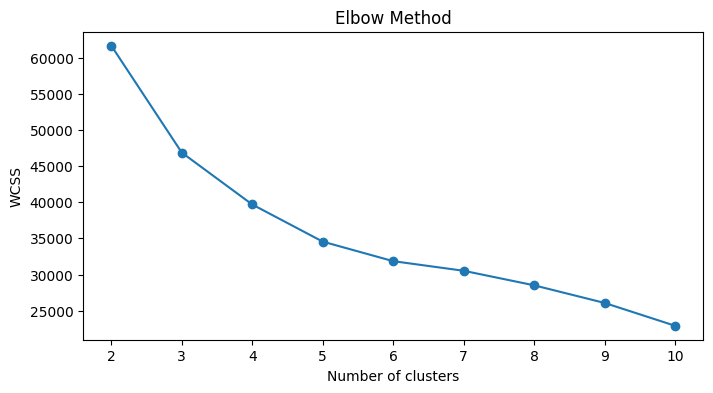

In [103]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # reduce to 2 components for visualization
x_pca = pca.fit_transform(x_scaler)


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from kneed import KneeLocator  # For automatic elbow detection


wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaler)
    wcss.append(kmeans.inertia_)  # WCSS

plt.figure(figsize=(8,4))
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [104]:
knee = KneeLocator(range(2, 11), wcss, curve='convex', direction='decreasing')
print(f"Optimal number of clusters (Elbow/Knee method): {knee.knee}")

Optimal number of clusters (Elbow/Knee method): 5


Clusters=2, Silhouette Score=0.458
Clusters=3, Silhouette Score=0.476
Clusters=4, Silhouette Score=0.518
Clusters=5, Silhouette Score=0.558
Clusters=6, Silhouette Score=0.607
Clusters=7, Silhouette Score=0.582
Clusters=8, Silhouette Score=0.545
Clusters=9, Silhouette Score=0.537
Clusters=10, Silhouette Score=0.546


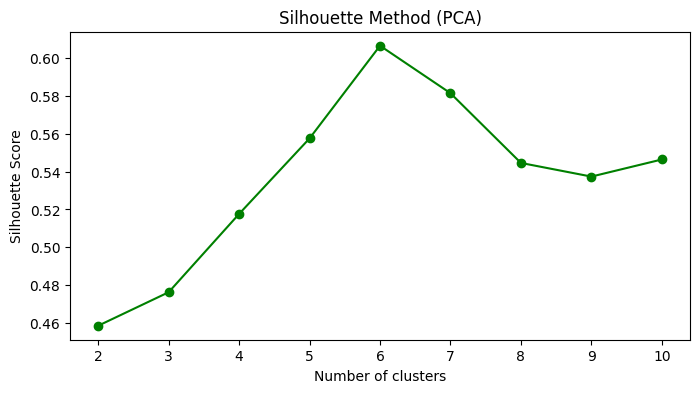

In [105]:
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_pca)
    score = silhouette_score(x_pca, labels)
    sil_scores.append(score)
    print(f"Clusters={k}, Silhouette Score={score:.3f}")

plt.figure(figsize=(8,4))
plt.plot(range(2, 11), sil_scores, marker='o', color='green')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method (PCA)')
plt.show()